# Statistical analysis

In [19]:
import io
import re
import pickle
import pandas as pd

dt = pd.read_csv('../data/frame/kadencja_dates.csv', sep=';')
dt['date'] = pd.to_datetime(dt['date'])
dt.insert(2, 'dzien', None, True)

In [20]:
last_posiedzenie = 0
last_dzien = 0

dt = dt.reset_index()
for index, row in dt.iterrows():
    current_posiedzenie = row['posiedzenie']
    if current_posiedzenie != last_posiedzenie:
        last_posiedzenie = current_posiedzenie
        last_dzien = 0
    last_dzien += 1
    dt.at[index, 'dzien'] = last_dzien
dt = dt.drop('index', 1)
print(dt)

     kadencja  posiedzenie dzien       date
0           9           55     1 2022-05-25
1           9           55     2 2022-05-26
2           9           54     1 2022-05-11
3           9           54     2 2022-05-12
4           9           53     1 2022-04-27
..        ...          ...   ...        ...
363         8            1     1 2015-11-12
364         8            1     2 2015-11-13
365         8            1     3 2015-11-16
366         8            1     4 2015-11-18
367         8            1     5 2015-11-19

[368 rows x 4 columns]


C:\Users\ABC\AppData\Local\Temp\ipykernel_19568\3799342291.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dt = dt.drop('index', 1)


In [21]:
d_pis = pd.read_csv('../data/frame/pis.csv', sep=';')
d_pis.insert(1, 'party', 'pis', True)
d_po = pd.read_csv('../data/frame/po.csv', sep=';')
d_po.insert(1, 'party', 'po', True)
d_konf = pd.read_csv('../data/frame/konfederacja.csv', sep=';')
d_konf.insert(1, 'party', 'konf', True)
frames = [d_pis, d_po, d_konf]
dp = pd.concat(frames)
dp = dp.reset_index()
dp = dp.drop('index', 1)
print(dp)

                   posel party
0     Władysław Kurowski   pis
1         Andrzej Gawron   pis
2        Urszula Rusecka   pis
3           Jan Warzecha   pis
4      Paweł Szefernaker   pis
..                   ...   ...
511  Janusz Korwin-Mikke  konf
512        Jakub Kulesza  konf
513       Paweł Skutecki  konf
514           Jacek Wilk  konf
515      Robert Winnicki  konf

[516 rows x 2 columns]


C:\Users\ABC\AppData\Local\Temp\ipykernel_19568\2485654737.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp = dp.drop('index', 1)


# Dataframe creation

In [22]:
dw = {'kadencja': [], 'posiedzenie': [], 'dzien': [], 'wypowiedz': [], 'posel': [], 'party': [],        #  0-5
      'date': [], 'score': [], 'raw_text': [], 'raw_words': [], 'lemma_words': [], 'raw_length': [],    #  6-11
      'words_length': [], 'words_count': [], 'words_avg': [], 'lemma_count': []}                       #  12-15
df = pd.DataFrame(data=dw)

In [23]:
speeches = io.open(f"../data/frame/all_speeches.txt", mode="r", encoding="utf-8")
sp_lines = speeches.read().split('\n')

In [24]:
for speech in sp_lines:
    elements = speech.split('@@')
    df.loc[len(df.index)] = [int(elements[0]), int(elements[1]), int(elements[2]), int(elements[3]), elements[4], None, 
                             None, None, elements[5], None, None, None,
                             None, None, None, None]
print(df)

       kadencja  posiedzenie  dzien  wypowiedz                      posel  \
0             8            1      1         26           Ryszard Terlecki   
1             8            1      1         27                 Piotr Apel   
2             8            1      1         28           Ryszard Terlecki   
3             8            1      1         29          Kornel Morawiecki   
4             8            1      1         30  Władysław Kosiniak-Kamysz   
...         ...          ...    ...        ...                        ...   
53113         9            9      5          4           Piotr Zgorzelski   
53114         9            9      5          6             Dariusz Rosati   
53115         9            9      5          7           Krzysztof Paszyk   
53116         9            9      5          8         Robert Kwiatkowski   
53117         9            9      5          9            Krzysztof Bosak   

      party  date score                                           raw_text 

In [ ]:
for i in range(df.shape[0]):
    df.at[i, 'raw_length'] = len(df.at[i, 'raw_text'])
# print(df)

In [ ]:
for i in range(df.shape[0]):
    e_words = re.split("[!\"#%&()+,\-./:;<=>?@\[\]_`§°·×–‘’”„…\n\xa0 ]", df.at[i, 'raw_text'])
    words = list(filter(None, e_words))
    count = 0
    for word in words:
        count += len(word)
    
    df.at[i, 'raw_words'] = words
    df.at[i, 'words_length'] = count
    df.at[i, 'words_count'] = len(words)
    if len(words) > 0:
        df.at[i, 'words_avg'] = count / len(words)
# print(df)

In [ ]:
for i in range(df.shape[0]):
    posel = df.at[i, 'posel']
    party = dp.query('posel == @posel')
    if not party.empty:
        df.at[i, 'party'] = party.iat[0, 1]
# print(df)

In [ ]:
for i in range(df.shape[0]):
    kadencja = df.at[i, 'kadencja']
    posiedzenie = df.at[i, 'posiedzenie']
    dzien = df.at[i, 'dzien']
    date = dt.query('kadencja == @kadencja & posiedzenie == @posiedzenie & dzien == @dzien')
    if not date.empty:
        df.at[i, 'date'] = date.iat[0, 3]
# print(df)

# Lemmatisation
### Solution provided by Mikołaj

One-letter words:

*{'S', 'B', 'e', 'H', 'v', 'ż', '5', 'Ż', 'ś', '#', 'š', 'N', 'í', 'î', 'ô', 'X', 'Ź', 'C', 'I', 'ł', ',', 'ü',
'T', 'â', 'Ł', '7', 'P', 'J', '6', 'D', 'V', 'a', 'ń', '0', '>', 'ź', '`', 'ö', 'ć', 'U', 'G', 'É', '.', 'é',
'-', 'y', '_', 'i', 'h', 's', 'b', 'ý', '9', 'm', 'x', 'K', 'Ś', 'Z', 'j', 'W', 'F', 'd', '4', 'Q', 'A', 'L',
'<', '3', 'č', '1', 'ë', 'M', 'o', 'á', 'z', 'E', '2', 'w', 'ó', 'k', 'u', 'Y', 'R', 'p', 'Ć', 'c', 'ę', 'ç',
'Č', 't', 'O', 'ä', '8', 'n', 'ă', 'g', 'ą', "'", 'l', 'f', 'r', '&', 'ş', ' ', 'q'}*

Lemma_count is not reliable as a pure value, but we assume errors are distributed randomly,
therefore it can be ignored in the comparison analysis.

In [31]:
import morfeusz2
morf = morfeusz2.Morfeusz()
    
def get_lemmatisers(speech):
    analysed_speech = morf.analyse(speech)
    lemmatiser = []
    prev = (0,0)
    for i in range(len(analysed_speech)):
        if prev != (analysed_speech[i][0], analysed_speech[i][1]) and analysed_speech[i][2][2] != 'interp':
            lemmatiser.append(analysed_speech[i][2][1])
        prev = (analysed_speech[i][0], analysed_speech[i][1])
    return lemmatiser

all_words = set()

for i in range(df.shape[0]):
    words = get_lemmatisers(df.at[i, 'raw_text'])
    all_words.update(words)
    df.at[i, 'lemma_words'] = words
    df.at[i, 'lemma_count'] = len(words)

# verification
    
print(len(all_words))
print()
print(df)

67640

       kadencja  posiedzenie  dzien  wypowiedz                      posel  \
0             8            1      1         26           Ryszard Terlecki   
1             8            1      1         27                 Piotr Apel   
2             8            1      1         28           Ryszard Terlecki   
3             8            1      1         29          Kornel Morawiecki   
4             8            1      1         30  Władysław Kosiniak-Kamysz   
...         ...          ...    ...        ...                        ...   
53113         9            9      5          4           Piotr Zgorzelski   
53114         9            9      5          6             Dariusz Rosati   
53115         9            9      5          7           Krzysztof Paszyk   
53116         9            9      5          8         Robert Kwiatkowski   
53117         9            9      5          9            Krzysztof Bosak   

      party                 date score  \
0       pis  2015-11-12 00

In [32]:
# pack

df_file = io.open('../data/frame/data_frame.txt', mode="wb")
pickle.dump(df, df_file)
df_file.close()

words_file = io.open('../data/frame/all_lemmas.txt', mode="wb")
pickle.dump(all_words, words_file)
words_file.close()

# Sentiment analysis
### Solution provided by Mateusz

In [1]:
import io
import pickle

from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

model = load_model('../models/sentiment-analysis-model/finalsentimentmodel.h5')
model.summary()

with open('../models/sentiment-analysis-model/finalwordindex.pkl', 'rb') as picklefile:
    word_index = pickle.load(picklefile)
top_words = len(word_index)
tokenizer = Tokenizer(num_words=top_words)
tokenizer.word_index = word_index

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         212313200 
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 212,430,835
Trainable params: 117,635
Non-trainable params: 212,313,200
_________________________________________________________________


In [2]:
# unpack

df_file = io.open('../data/frame/data_frame.txt', mode="rb")
df = pickle.load(df_file)
df_file.close()

words_file = io.open('../data/frame/all_lemmas.txt', mode="rb")
all_words = pickle.load(words_file)
words_file.close()

# verification 

print(len(all_words))
print()
print(df)

67640

       kadencja  posiedzenie  dzien  wypowiedz                      posel  \
0             8            1      1         26           Ryszard Terlecki   
1             8            1      1         27                 Piotr Apel   
2             8            1      1         28           Ryszard Terlecki   
3             8            1      1         29          Kornel Morawiecki   
4             8            1      1         30  Władysław Kosiniak-Kamysz   
...         ...          ...    ...        ...                        ...   
53113         9            9      5          4           Piotr Zgorzelski   
53114         9            9      5          6             Dariusz Rosati   
53115         9            9      5          7           Krzysztof Paszyk   
53116         9            9      5          8         Robert Kwiatkowski   
53117         9            9      5          9            Krzysztof Bosak   

      party                 date score  \
0       pis  2015-11-12 00

In [31]:
# model test

print(df.at[520, 'raw_text'])
print()

text = [df.at[520, 'raw_text']]
sequences = tokenizer.texts_to_sequences(text)
print(sequences)
print()

padding = pad_sequences(sequences, maxlen=40)
print(padding)
print()

result = model.predict(padding)
values = result[:, 1] * 100
print(values.mean())

Dziękuję. Przez 8 lat Platforma budowała drogi. Wybudowała ich kilka tysięcy. Budowała również tory kolejowe i wybudowała ich również kilka tysięcy. Faktem jest, że w latach 2014-2015 wybudowała i zmodernizowała linię kolejową nr 58, która otworzyła korytarz między Warszawą, subregionem zachodnim województwa śląskiego, przez Rybnik, Wodzisław, aż do granicy, do Czech, do Pragi. Od 13 grudnia uruchomiono pociąg do Pragi na tej linii, ale faktem jest, że pozostał do realizacji tego projektu odcinek między Wodzisławem a Chałupkami z budową przystanku kolejowego. Mam taką propozycję: poprzyjcie ten wniosek. Panie ministrze Adamczyk, będziemy mieli szansę sprawdzić, jak sprawnie realizujecie tę inwestycję i czy ona będzie rzeczywiście tańsza. Dziękuję.

[[173, 103, 861, 155, 5700, 61766, 2239, 139, 250, 2386, 61766, 239, 22918, 78653, 1, 139, 239, 250, 2386, 4878, 24, 30, 3, 2633, 3096, 2460, 1, 22858, 1101, 15814, 422, 22504, 146361, 1623, 52343, 71844, 31114, 99169, 103, 30143, 78758, 324

In [ ]:
for i in range(df.shape[0]):
    text = [df.at[i, 'raw_text']]
    sequences = tokenizer.texts_to_sequences(text)
    padding = pad_sequences(sequences, maxlen=40)
    result = model.predict(padding)
    values = result[:, 1] * 100
    df.at[i, 'score'] = values.mean()

In [30]:
print(df)

       kadencja  posiedzenie  dzien  wypowiedz                      posel  \
0             8            1      1         26           Ryszard Terlecki   
1             8            1      1         27                 Piotr Apel   
2             8            1      1         28           Ryszard Terlecki   
3             8            1      1         29          Kornel Morawiecki   
4             8            1      1         30  Władysław Kosiniak-Kamysz   
...         ...          ...    ...        ...                        ...   
53113         9            9      5          4           Piotr Zgorzelski   
53114         9            9      5          6             Dariusz Rosati   
53115         9            9      5          7           Krzysztof Paszyk   
53116         9            9      5          8         Robert Kwiatkowski   
53117         9            9      5          9            Krzysztof Bosak   

      party                 date      score  \
0       pis  2015-11-12 00:0

In [32]:
# pack back

df_scored = io.open('../data/frame/all_frame.txt', mode="wb")
pickle.dump(df, df_scored)
df_scored.close()

# Statistical analysis

In [2]:
import os
import io
import re
import pickle
import pandas as pd
import numpy as np

# unpack

df_file = io.open('../data/frame/all_frame.txt', mode="rb")
df = pickle.load(df_file)
df_file.close()

words_file = io.open('../data/frame/all_lemmas.txt', mode="rb")
words = pickle.load(words_file)
words_file.close()

In [3]:
# verification

print(len(words))
print()
print(df)

67640

       kadencja  posiedzenie  dzien  wypowiedz                      posel  \
0             8            1      1         26           Ryszard Terlecki   
1             8            1      1         27                 Piotr Apel   
2             8            1      1         28           Ryszard Terlecki   
3             8            1      1         29          Kornel Morawiecki   
4             8            1      1         30  Władysław Kosiniak-Kamysz   
...         ...          ...    ...        ...                        ...   
53113         9            9      5          4           Piotr Zgorzelski   
53114         9            9      5          6             Dariusz Rosati   
53115         9            9      5          7           Krzysztof Paszyk   
53116         9            9      5          8         Robert Kwiatkowski   
53117         9            9      5          9            Krzysztof Bosak   

      party                 date      score  \
0       pis  2015-11-

In [4]:
for i in range(df.shape[0]):
    if df.at[i, 'party'] == 'konf':
        df.at[i, 'party'] = 'Konfederacja'
    elif df.at[i, 'party'] == 'pis':
        df.at[i, 'party'] = 'PiS'
    elif df.at[i, 'party'] == 'po':
        df.at[i, 'party'] = 'PO'
    else:
        df.at[i, 'party'] = 'Unlisted'

print(df)

       kadencja  posiedzenie  dzien  wypowiedz                      posel  \
0             8            1      1         26           Ryszard Terlecki   
1             8            1      1         27                 Piotr Apel   
2             8            1      1         28           Ryszard Terlecki   
3             8            1      1         29          Kornel Morawiecki   
4             8            1      1         30  Władysław Kosiniak-Kamysz   
...         ...          ...    ...        ...                        ...   
53113         9            9      5          4           Piotr Zgorzelski   
53114         9            9      5          6             Dariusz Rosati   
53115         9            9      5          7           Krzysztof Paszyk   
53116         9            9      5          8         Robert Kwiatkowski   
53117         9            9      5          9            Krzysztof Bosak   

              party                 date      score  \
0               PiS 

In [5]:
all_word_count = 0
konf_word_count = 0
other_word_count = 0
pis_word_count = 0
po_word_count = 0

for i in range(df.shape[0]):
    if df.at[i, 'party'] == 'Konfederacja':
        konf_word_count += df.at[i, 'lemma_count']
    elif df.at[i, 'party'] == 'PiS':
        pis_word_count += df.at[i, 'lemma_count']
    elif df.at[i, 'party'] == 'PO':
        po_word_count += df.at[i, 'lemma_count']
    else:
        other_word_count += df.at[i, 'lemma_count']

significance = {'Konfederacja': 0.65, 'PiS': konf_word_count / pis_word_count,
                'PO': konf_word_count / po_word_count, 'Unlisted': konf_word_count / other_word_count}
all_word_count = konf_word_count + other_word_count + pis_word_count + po_word_count
print("ALL:    " + str(all_word_count))
print()
print("KONF:   " + str(konf_word_count))
print("PIS:    " + str(pis_word_count))
print("PO:     " + str(po_word_count))
print("OTHERS: " + str(other_word_count))
print()
print(significance)

ALL:    13087250

KONF:   488868
PIS:    3744181
PO:     4832646
OTHERS: 4021555

{'Konfederacja': 0.65, 'PiS': 0.13056740579582024, 'PO': 0.1011594890252669, 'Unlisted': 0.12156193313283047}


# Topic analysis

In [6]:
topics = []
topics_titles = ['abrocja', 'Bóg', 'drożyzna', 'inflacja', 'komunizm', 'podatek', 'podwyżka', 'problem', 'przyszłość', 'respirator', 'sąd', 'szczepionka', 'wojna', 'wybory', 'zło', 'ZUS']

### Chosen topics:

0. abrocja
1. Bóg
2. drożyzna
3. inflacja
4. komunizm
5. podatek
6. podwyżka
7. problem
8. przyszłość
9. respirator
10. sąd
11. szczepionka
12. wojna
13. wybory
14. zło
15. ZUS

In [7]:
bag = set()
for word in words:
    if re.search("aborcy?j", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'postaborcyjny', 'aborcjonista', 'aborcjonistka', 'aborcjonizm', 'poaborcyjnym', 'poaborcyjny', 'aborcyjny', 'antyaborcyjny', 'aborcyjnie', 'proaborcyjny', 'aborcja', 'antyaborcjonista'}


In [8]:
bag = set()
for word in words:
    if re.search("b[oó][gż]", word) is not None:
        bag.add(word)

bad = {'Juterbogk', 'bogaty:A', 'przebogaty', 'bogacieć', 'bogaty:S', 'bogacić', 'ubogość', 'bogdanka', 'olaboga', 'ubogi:A', 'wzbogacać', 'wzbogacić', 'ubogi:S', 'ubogacać', 'Dębogóra', 'bogdan', 'superbogacz', 'rybogryfem', 'nowobogacki:S', 'bogactwo', 'ubogacić', 'Pobóg', 'niebogaty', 'bogacz', 'bogato', 'pobożenarodzeniowych', 'bożonarodzeniowy', 'zubożyć', 'zbożowy', 'zboże', 'Poboży:Sm1', 'zubożały', 'zubożenie', 'ubożeć', 'zubożeć', 'zubożać'}
bag = bag.difference(bad)
print(bag)
topics.append(bag)

{'nabożność', 'bezbożnictwo', 'zbożny', 'bogobojny', 'pobożna', 'bożyszcze', 'bóg', 'bożoojczyźniany', 'bezbożny:A', 'bogoojczyźniany', 'nabożeństwo', 'pobożny:A', 'pobożność', 'bezbożny:S', 'bożnica', 'bożka', 'bożek', 'dalibóg:I', 'bogini', 'pobożny:S', 'bożyć', 'boży', 'nabożny'}


In [9]:
bag = set()
for word in words:
    if re.search("drożyzn", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'hiperdrożyzna', 'drożyzna'}


In [10]:
bag = set()
for word in words:
    if re.search("inflacy?j", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'hiperinflacja', 'megainflacja', 'proinflacyjny', 'inflacjonistów', 'inflacja', 'inflacyjny', 'inflacjia', 'inflacyjnie', 'antyinflacyjny', 'inflacjotwórczego', 'proinflacyjnie', 'przeciwinflacyjny'}


In [11]:
bag = set()
for word in words:
    if re.search("komun", word) is not None:
        bag.add(word)

bad = {'komunikatywny', 'komunia', 'komunikacyjnie', 'komunał', 'telekomunikacyjny', 'ekskomunika', 'zakomunikować', 'komunikator:Sm1', 'komunikat', 'skomunikować', 'radiokomunikacyjny', 'komunikatywność', 'komunikacja', 'telekomunikacja', 'komunikacyjny', 'komunikować', 'komunikator:Sm3'}
bag = bag.difference(bad)
print(bag)
topics.append(bag)

{'komunalizacyjny', 'neokomunistyczny', 'komunizacja', 'komunizować', 'komunalny', 'neoeurokomuną', 'dekomunizować', 'komunalizacja', 'skomunalizować', 'skomunizować', 'komunalizować', 'dekomunizator', 'komunista', 'eurokomuna', 'antykomunistyczny', 'antykomunizm', 'odkomunizować', 'eurokomunizm', 'komuna', 'komunistka', 'pokomunalne', 'rekomunizacja', 'dekomunizacyjny', 'postkomunista', 'postkomunistyczny', 'niekomunistyczny', 'komunistyczny', 'postkomuna', 'dekomunizacja', 'postkomunizm', 'neokomuna', 'komunizm', 'rekomunizujcie', 'antykomunista', 'zdekomunizować', 'eurokomunista', 'rekomunizujecie'}


In [12]:
bag = set()
for word in words:
    if re.search("podate?k", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'odpodatkowywanie', 'odpodatkowania', 'europodatek', 'odpodatkowywaniem', 'odpodatkować', 'podatkowo', 'quasi-podatkowy', 'pseudopodatek', 'samoopodatkować', 'odpodatkowanie', 'podatkowców', 'niepodatek', 'podatkowy', 'odpodatkowaniu', 'odpodatkowani', 'naliczonopodatek', 'okołopodatkowych', 'prawnopodatkowy', 'opodatkowanie', 'odpodatkowałoby', 'propodatkowy', 'pozapodatkowy', 'podatek', 'odpodatkujmy', 'opodatkować', 'Odpodatkujmy', 'opodatkowywać', 'quasi-podatek', 'publicznopodatkowy', 'parapodatek', 'odpodatkowało', 'e-podatek', 'ekstrapodatek', 'podatkować', 'odpodatkowałby', 'niepodatkowy'}


In [13]:
bag = set()
for word in words:
    if re.search("podwyżk", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'podwyżka', 'podwyżkowy'}


In [14]:
bag = set()
for word in words:
    if re.search("problem", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'bezproblemowy', 'wieloproblemowość', 'problem', 'pseudoproblem', 'problematyka', 'problematyczność', 'problemowy', 'problemat', 'problematyczny', 'wieloproblemowy', 'bezproblemowo'}


In [15]:
bag = set()
for word in words:
    if re.search("przyszł", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'przyszłotygodniowy', 'przyszłoroczny', 'przyszłość', 'nieprzyszłościowy', 'przyszły', 'przyszłościowy', 'przyszłościowo'}


In [16]:
bag = set()
for word in words:
    if re.search("respirator", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'respirator', 'respiratorowych', 'respiratorowej', 'respiratorowe'}


In [17]:
bag = set()
for word in words:
    if re.search("sąd", word) is not None:
        bag.add(word)

bad = {'antyzdroworozsądkowy', 'rozsądzać', 'podsądny:A', 'Przedsąd', 'posądzić', 'starosądeczanin', 'zdroworozsądkowy', 'podsądny:S', 'osąd', 'nowosądecki', 'przesądzać', 'przedsądy', 'sądny', 'przesądzający', 'samosąd', 'sądeczanin', 'rozsądny', 'sądeczanki', 'przesąd', 'sądeczance', 'rozsądek', 'sądecki', 'nierozsądnie', 'przedsądu', 'sądeczanką', 'rozsądzić', 'rozsądkowy', 'przesądzić', 'sądeczankę', 'sądeczanka', 'przedsądach', 'sądzić', 'zdroworozsądkowo', 'rozsądnie', 'Nowosądecczyzny', 'posądzenie', 'nierozsądny', 'przesądnie', 'posądzać'}
bag = bag.difference(bad)
print(bag)
topics.append(bag)

{'osądzić', 'quasi-sąd', 'sądownictwo', 'pozasądowy', 'zasądzony:S', 'sądowo', 'zasądzać', 'quasi-sądowy', 'niezasądzony', 'zasądzona', 'sądownia', 'zasądzić', 'patosąd', 'sądowniczy', 'sąd', 'nadsąd', 'osądzać', 'odsądzać', 'przedsądowy', 'pozasądowo', 'sądowy', 'sądowoadministracyjny', 'przedsąd', 'e-sąd', 'niby-sąd', 'niesądowy', 'zasądzony:A'}


In [18]:
bag = set()
for word in words:
    if re.search("szczepionk", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'szczepionkobus', 'proszczepionkowcy', 'antyszczepionkowcy', 'antyszczepionkowy', 'antyszczepionkowcach', 'nieszczepionkowców', 'antyszczepionkowców', 'szczepionka', 'antyszczepionkowcom', 'antyszczepionkowcowami', 'szczepionkowy', 'antyszczepionkowcem', 'szczepionkobusa', 'antyszczepionkowcami', 'antyszczepionkowiec'}


In [19]:
bag = set()
for word in words:
    if re.search("woje?n", word) is not None:
        bag.add(word)

bad = {'międzywojnie', 'rozdwojenie', 'przedwojenny', 'tużpowojenny', 'powojenny', 'zimnowojenny', 'konwojent', 'międzywojenny', 'zimnowojennie'}
bag = bag.difference(bad)
print(bag)
topics.append(bag)

{'antywojenny', 'wojna', 'wojenny', "wojenny'", 'wojenka'}


In [20]:
bag = set()
for word in words:
    if re.search("wybor", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'wyborczczego', 'wyborca', 'pilnujwyborow', "wyborczego'", 'eurowybory', 'powyborczy', 'wyborny', 'wyborczo', 'wyborcosceptycy', 'wybory', 'parawyborczy', 'przedwyborczy', 'wyborowy', 'wyborczyni', 'wyborczy', 'pseudowybory', 'e-wybory', 'niewyborczy', 'prawybory'}


In [21]:
bag = set()
for word in words:
    if re.match("zły|zło(?![tż])|źle", word) is not None:
        bag.add(word)

bad = {'złocieniecki', 'złośliwości', 'złowić', 'złodziejski', 'złośliwie', 'złodziejstwo', 'złośliwy', 'złość', 'złomowy', 'złośliwość', 'złomiarz', 'złomowisko', 'złomować', 'złodziejaszek', 'złoić', 'złodziej', 'złom', 'złocisty', 'złościć', 'złodziejka'}
bag = bag.difference(bad)
print(bag)
topics.append(bag)

{'złowieszczy', 'zły:A', 'zły:S', 'złowieszczyła', 'złowieszczo', 'złoczyńca', 'złorzeczyć', 'złowrogi', 'zło', 'źle', 'złowrogo'}


In [22]:
bag = set()
for word in words:
    if re.search("ZUS", word) is not None:
        bag.add(word)
print(bag)
topics.append(bag)

{'ZUS'}


### Rejected topics:

0. 500+
1. dług
2. dobro
3. dziecko
4. edukacja
5. emeryt
6. nauczyciel
7. Polska
8. Unia
9. zdrowie
10. złodziej

In [23]:
bag = set()
for word in words:
    if re.search("500|pięćset", word) is not None:
        bag.add(word)

bad = {'2500', '500-milionowy', '3500', '6500', '500-tysięczny', '5003,78', '1500', '500-stronicowy', '500-lecie', '7500', '500-metrowy', '500-osobowy:A', '5500', '500-letni', '4500', '5009', '5000', '500-złotowy', 'pięćsetka'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("dług", word) is not None:
        bag.add(word)

bad = {'długomyślenie', 'długodystansowiec', 'długowłosy:S', 'niedługi', 'długość', 'długo', 'długoterminowy', 'według', 'długotrwały', 'długofalowość', 'przydługi', 'długotrwale', 'długi', 'długodystansowy', 'długosz', 'długoterminowo', 'długopis', 'przydługo', 'długofalowy', 'długoletni', 'długookresowy', 'długookresowo', 'długofalowo', 'długoplanowy', 'długotrwałość', 'niedługo'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("dobr", word) is not None:
        bag.add(word)

bad = {'dobrowolność', 'przedobrzyć', 'udobruchać', 'dobrski', 'miodobranie', 'dobrzanin', 'Aldobrandini', 'dobrzyński', 'dobrzeniaków', 'dobrnąć', 'dobrzański', 'dobrać', 'dobranocka', 'dobrosułowski', 'dobrowolnie', 'dobrowolny', 'dobranie', 'dobranoc:I', 'dobrany', 'niby-dobry:Sm1', 'niedobrze', 'niby-dobra:S', 'niby-dobre', 'niedobry'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("dziec", word) is not None:
        bag.add(word)

bad = {'Zdziechowa', 'bodziec', 'zdradziecki', 'Ujeździec', 'grodziec', 'poradziecki', 'dziecinada', 'zdradziecko', 'proradziecki', 'Nowogrodziec', 'Zdziechowski', 'dlugwdziecznosci', 'jeździec', 'radziecki', 'postradziecki', 'jeździecki', 'Radziechowy'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("edukacy?j", word) is not None:
        bag.add(word)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("emeryt", word) is not None:
        bag.add(word)

bad = {'niemerytoryczny', 'niemerytorycznie'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("nauczyciel", word) is not None:
        bag.add(word)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("Polska", word) is not None:
        bag.add(word)

bad = {'Poczta_Polska'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("uni[aioj]", word) is not None:
        bag.add(word)

bad = {'komunia', 'pecunia', 'communio', 'juniorski', 'wielunianin', 'Agrounia', 'uniokratów', 'sunia', 'prezesunio', 'AGROunia', 'Rumunia', 'torunianin', 'juniorek', 'Trzebunia:Sf','junior', 'Orunia', 'juniorka', 'piątunio'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("zdrow", word) is not None:
        bag.add(word)

bad = {'antyzdroworozsądkowy', 'uzdrowienie', 'zdroworozsądkowy', 'prozdrowotnie', 'uzdrowiskowy', 'uzdrowisko', 'pozdrowieć', 'uzdrowiciel', 'pozdrowić', 'pozdrowienie', 'uzdrowicielski', 'zdroworozsądkowo', 'uzdrowić'}
bag = bag.difference(bad)
print(bag)
print()
# topics.append(bag)

bag = set()
for word in words:
    if re.search("złodziej", word) is not None:
        bag.add(word)
print(bag)
print()
# topics.append(bag)

{'pięćset', '500', 'Rodzina500'}

{'dług'}

{'dobrostanowy', 'dobrosąsiedzki', 'dobrzeć', 'dobry', 'superdobry:A', 'dobroczynienie', 'dobroczynnie', 'dobra:S', 'dobroczynny', 'dobrobyt', 'dobrodziej', 'dobrotliwie', 'dobro', 'dobry:Sm1', 'dobry:A', 'dobrze', 'dobrodziejstwo', 'dobroduszny', 'dobrotliwy', 'dobrostan', 'dobroczynność', 'dobre', 'przedobry', 'dobrozmianowy:A', 'dobrodziejka', 'dobroć', 'dobroczyńca'}

{'dziecię', 'dzieciami', 'dziecięcy', 'dziecina', 'dziecinnie', 'ekstradziecko', 'dzieciątko', 'dzieciaczek', 'dzieciak', 'dziecko', 'wczesnodziecięcy', 'dzieciPodczas', 'dzieciństwo', 'dziecinny', 'dzieciobójstwo'}

{'proedukacyjny', 'edukacyjny', 'reedukacja', 'edukacja', 'redukacji', 'pseudoedukacyjny', 'koedukacyjny', 'bronimyedukacji', 'dysedukacja', 'koedukacja', 'edukacyjnie'}

{'biedaemerytury', 'emerytka', 'emerytować', 'przedemerytalny', 'biedaemerytów', 'biedaemeryturach', 'biedaemerytur', 'emerytalny', 'emeryt', 'emerytura', 'proemerytalny'}

{'pronauczycielski',

In [24]:
cols = {'party': [], 'date': [], 'sign': []}
data = [None] * 16

In [25]:
for topic in range(16):
    data[topic] = pd.DataFrame(data=cols)
    for i in range(df.shape[0]):
        for word in df.at[i, 'lemma_words']:
            if word in topics[topic]:
                data[topic].loc[data[topic].shape[0]] = [df.at[i, 'party'], df.at[i, 'date'], significance[df.at[i, 'party']]]


    data[topic] = data[topic].sort_values(by = 'party', ascending = False, key = lambda col: col.str.lower())
    print(str(topics_titles[topic]) + ': ' + str(data[topic].shape[0]) + ' occurrences')

abrocja: 806 occurrences
Bóg: 1066 occurrences
drożyzna: 420 occurrences
inflacja: 1447 occurrences
komunizm: 2926 occurrences
podatek: 21002 occurrences
podwyżka: 2522 occurrences
problem: 15143 occurrences
przyszłość: 6091 occurrences
respirator: 285 occurrences
sąd: 15709 occurrences
szczepionka: 778 occurrences
wojna: 4074 occurrences
wybory: 11823 occurrences
zło: 7200 occurrences
ZUS: 1803 occurrences


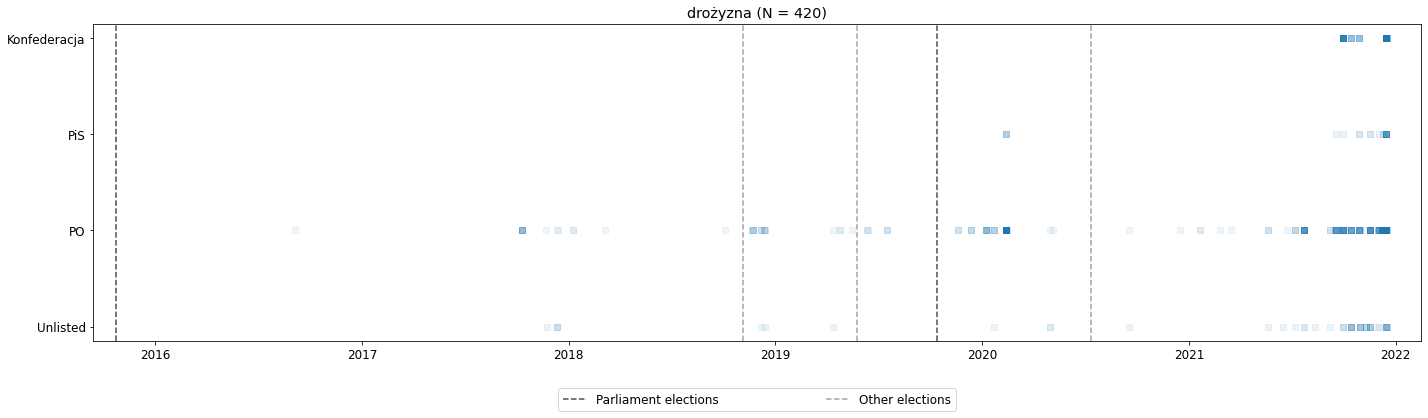

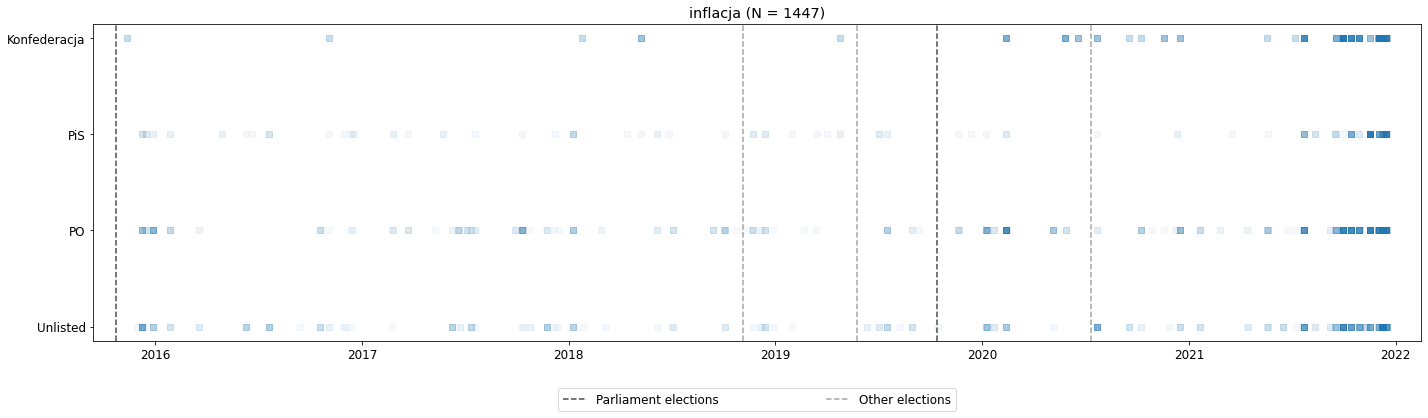

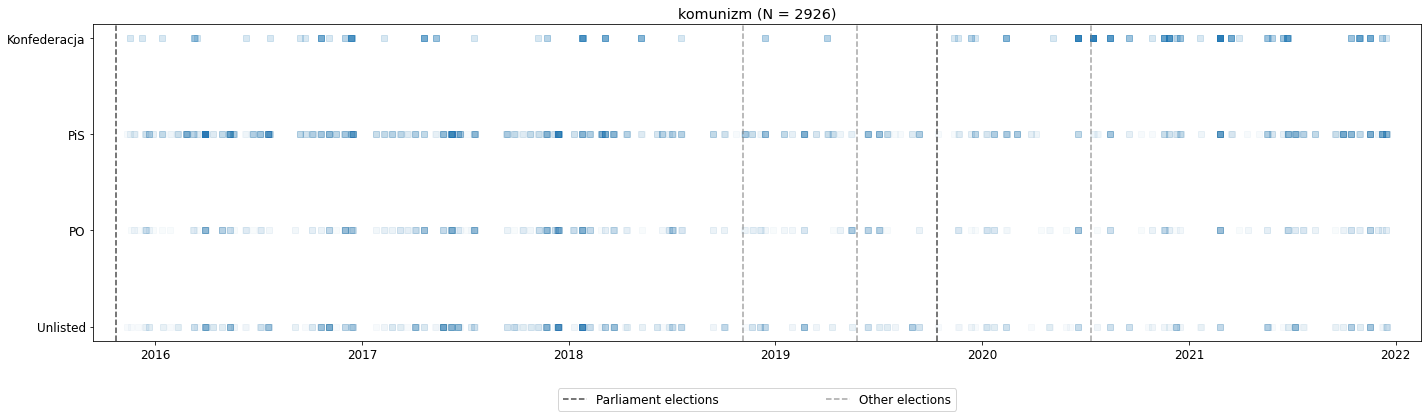

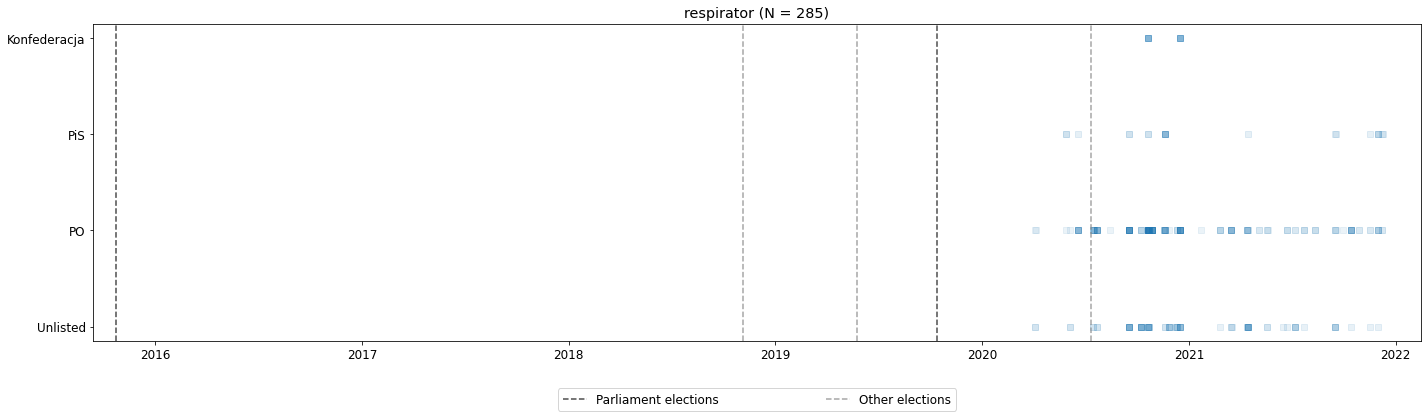

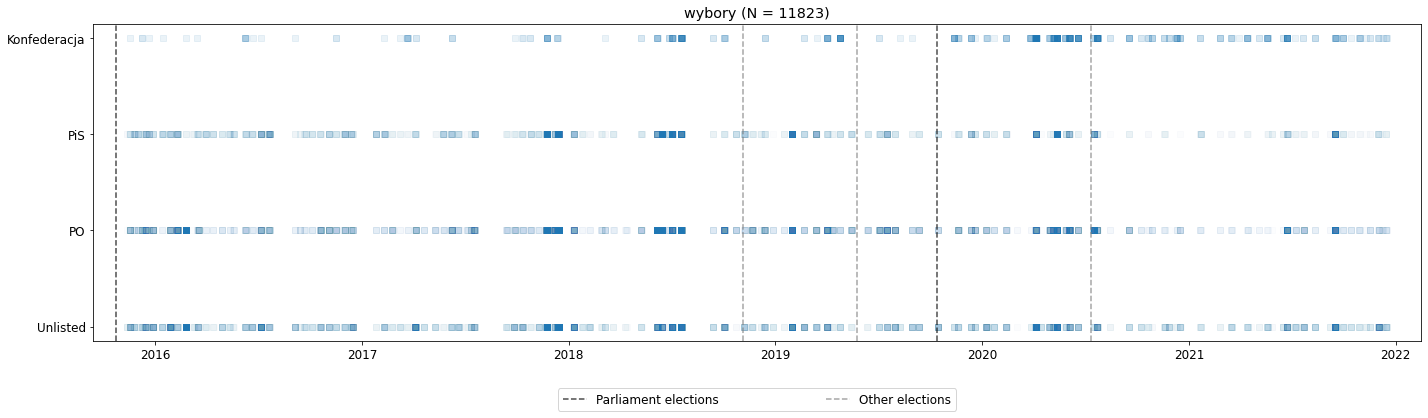

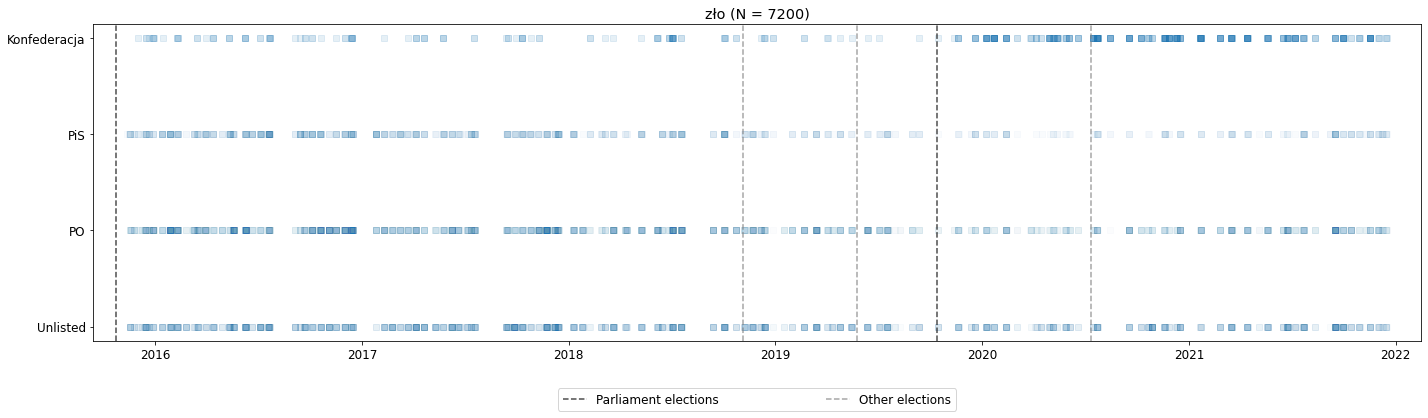

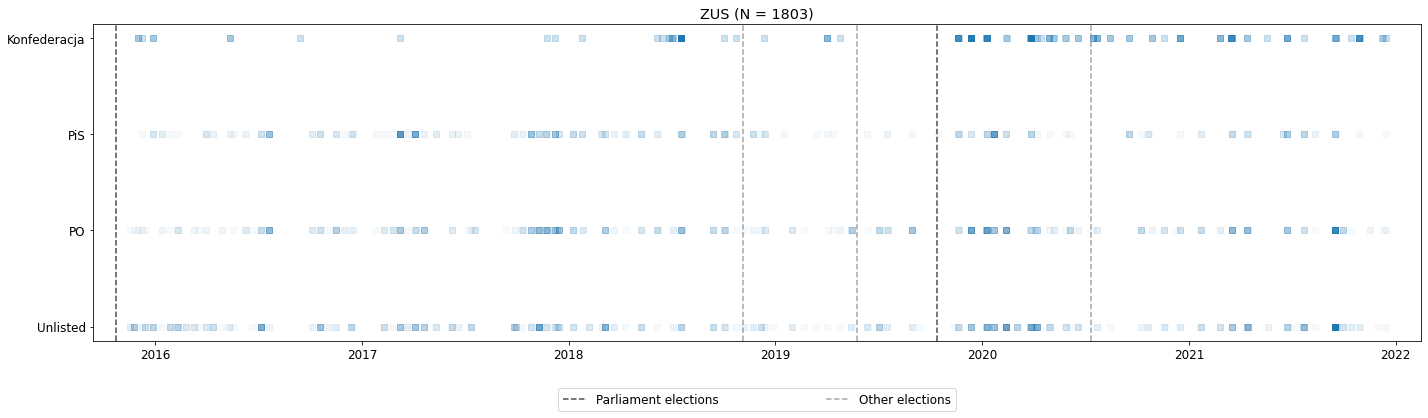

In [111]:
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from math import sqrt

xmin = min(df['date']) - timedelta(days = 60)
xmax = max(df['date']) + timedelta(days = 60)

for topic in range(16):
    fig, ax = plt.subplots(figsize = (20,6))

    plt.rc('font', size = 12)          # controls default text sizes
    plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
    plt.rc('ytick', labelsize = 12)    # fontsize of the tick labels
    plt.rc('figure', titlesize = 18)   # fontsize of the figure title

    plt.axvline(x = datetime.date(2015, 10, 25), color = 'black', alpha = 0.7, linestyle = '--', label = 'Parliament elections')    # Parliament (VIII)
    plt.axvline(x = datetime.date(2018, 11, 4), color = 'grey', alpha = 0.7, linestyle = '--', label = 'Other elections')           # local
    plt.axvline(x = datetime.date(2019, 5, 26), color = 'grey', alpha = 0.7, linestyle = '--')                                      # EParliament
    plt.axvline(x = datetime.date(2019, 10, 13), color = 'black', alpha = 0.7, linestyle = '--')                                    # Parliament (IX)
    plt.axvline(x = datetime.date(2020, 7, 12), color = 'grey', alpha = 0.7, linestyle = '--')                                      # presidential

    plt.grid(False)
    plt.title(str(topics_titles[topic]) + f' (N = {data[topic].shape[0]})')
    plt.legend(bbox_to_anchor=(0.35, -0.22, 0.3, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

    plot = plt.scatter(data[topic]['date'], data[topic]['party'],
                       alpha = data[topic]['sign'] * sqrt(1 / (data[topic].shape[0] / 200)),
                       marker = ',', aa = True)
    plt.xlim(left = xmin, right = xmax)

    fig.tight_layout()
    plt.show()
    fig.savefig(f'../renders/occurrences_{topic}.png', dpi = 300)

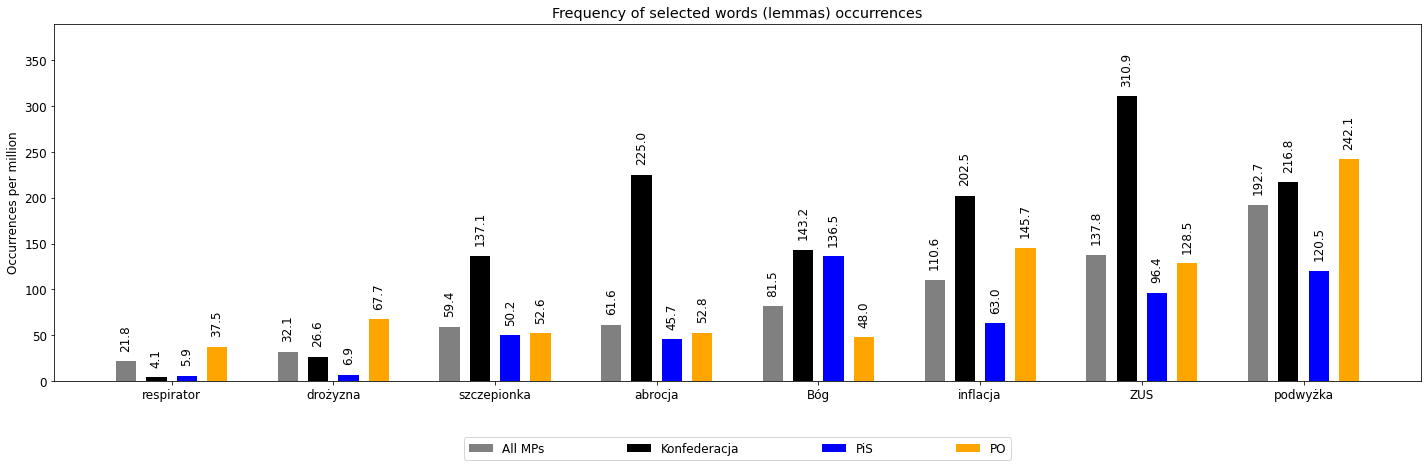

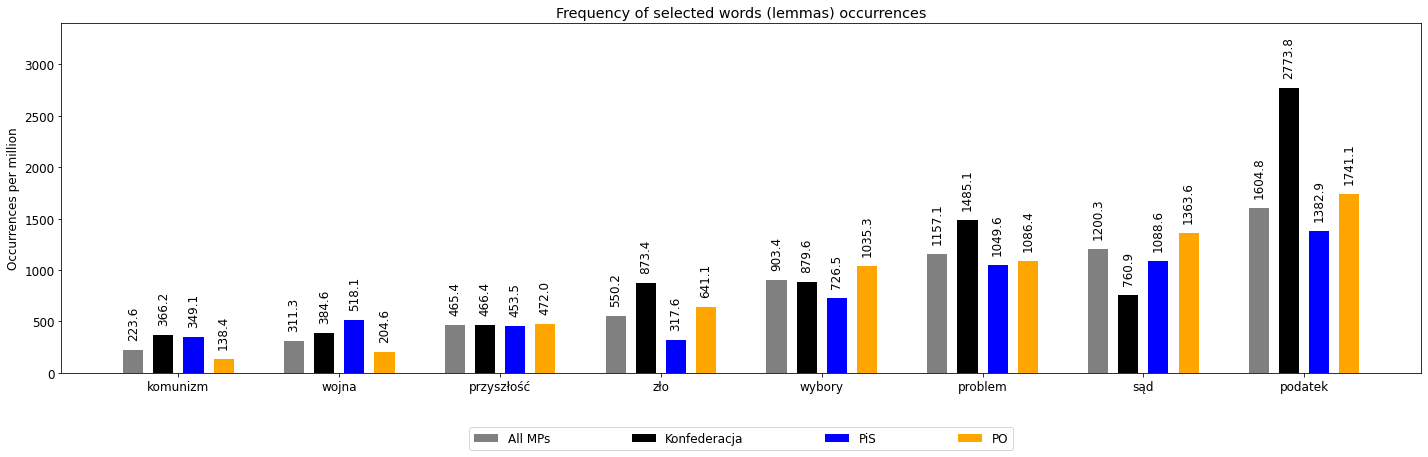

In [115]:
titles = []

# 1st plot
all_values = []
konf_values = []
pis_values = []
po_values = []

for topic in [9, 2, 11, 0, 1, 3, 15, 6]:
    all_values.append(data[topic].shape[0] * 1000000 / all_word_count)
    konf_values.append(data[topic]['party'].value_counts()['Konfederacja'] * 1000000 / konf_word_count)
    pis_values.append(data[topic]['party'].value_counts()['PiS'] * 1000000 / pis_word_count)
    po_values.append(data[topic]['party'].value_counts()['PO'] * 1000000 / po_word_count)
    titles.append(topics_titles[topic])

x = np.arange(8)                   # the label locations
width = 0.125                      # the width of the bars

fig, ax = plt.subplots(figsize = (20,6))
plt.rc('font', size = 12)          # controls default text sizes
plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 12)    # fontsize of the tick labels
plt.rc('figure', titlesize = 18)   # fontsize of the figure title

all_rects = ax.bar(x - 2.25 * width, all_values, width, label='All MPs', color = 'gray')
konf_rects = ax.bar(x - 0.75 * width, konf_values, width, label='Konfederacja', color = 'black')
pis_rects = ax.bar(x + 0.75 * width, pis_values, width, label='PiS', color = 'blue')
po_rects = ax.bar(x + 2.25 * width, po_values, width, label='PO', color = 'orange')

ax.set_ylabel('Occurrences per million')
ax.set_title('Frequency of selected words (lemmas) occurrences')
ax.set_xticks(x, titles)
ax.legend()

ax.bar_label(all_rects, padding = 10, fmt = '%.1f', rotation = 90)
ax.bar_label(konf_rects, padding = 10, fmt = '%.1f',  rotation = 90)
ax.bar_label(pis_rects, padding = 10, fmt = '%.1f',  rotation = 90)
ax.bar_label(po_rects, padding = 10, fmt = '%.1f',  rotation = 90)

fig.tight_layout()                  # resizes the figure

plt.ylim([0, 390])
plt.legend(bbox_to_anchor=(0.3, -0.22, 0.4, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.show()
fig.savefig('../renders/occurrences_all_1.png', dpi = 300)

# 2nd plot
all_values = []
konf_values = []
pis_values = []
po_values = []

for topic in [4, 12, 8, 14, 13, 7, 10, 5]:
    all_values.append(data[topic].shape[0] * 1000000 / all_word_count)
    konf_values.append(data[topic]['party'].value_counts()['Konfederacja'] * 1000000 / konf_word_count)
    pis_values.append(data[topic]['party'].value_counts()['PiS'] * 1000000 / pis_word_count)
    po_values.append(data[topic]['party'].value_counts()['PO'] * 1000000 / po_word_count)
    titles.append(topics_titles[topic])

x = np.arange(8)                   # the label locations
width = 0.125                      # the width of the bars

fig, ax = plt.subplots(figsize = (20,6))
plt.rc('font', size = 12)          # controls default text sizes
plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 12)    # fontsize of the tick labels
plt.rc('figure', titlesize = 18)   # fontsize of the figure title

all_rects = ax.bar(x - 2.25 * width, all_values, width, label='All MPs', color = 'gray')
konf_rects = ax.bar(x - 0.75 * width, konf_values, width, label='Konfederacja', color = 'black')
pis_rects = ax.bar(x + 0.75 * width, pis_values, width, label='PiS', color = 'blue')
po_rects = ax.bar(x + 2.25 * width, po_values, width, label='PO', color = 'orange')

ax.set_ylabel('Occurrences per million')
ax.set_title('Frequency of selected words (lemmas) occurrences')
ax.set_xticks(x, titles[8:])
ax.legend()

ax.bar_label(all_rects, padding = 10, fmt = '%.1f', rotation = 90)
ax.bar_label(konf_rects, padding = 10, fmt = '%.1f',  rotation = 90)
ax.bar_label(pis_rects, padding = 10, fmt = '%.1f',  rotation = 90)
ax.bar_label(po_rects, padding = 10, fmt = '%.1f',  rotation = 90)

fig.tight_layout()                  # resizes the figure

plt.ylim([0, 3400])
plt.legend(bbox_to_anchor=(0.3, -0.22, 0.4, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.show()
fig.savefig('../renders/occurrences_all_2.png', dpi = 300)

## Speech distribution

In [103]:
arrangement = [0, 1, 12, 9, 13, 10, 2, 11, 4, 14, 6, 15, 3, 8, 5, 7]
sentiment_sum = [0] * 16
sentiment_occ = [0] * 16
sentiment_value = []
sentiment_titles = []

for topic in arrangement:
    for i in range(df.shape[0]):
        for word in df.at[i, 'lemma_words']:
                if word in topics[topic]:
                    sentiment_occ[topic] += 1
                    sentiment_sum[topic] += df.at[i, 'score']
                    break

for topic in arrangement:
    sentiment_titles.append(topics_titles[topic])
    sentiment_value.append(sentiment_sum[topic] / sentiment_occ[topic])

sentiment_titles.append('All speeches')
sentiment_value.append(df['score'].sum() / df.shape[0])

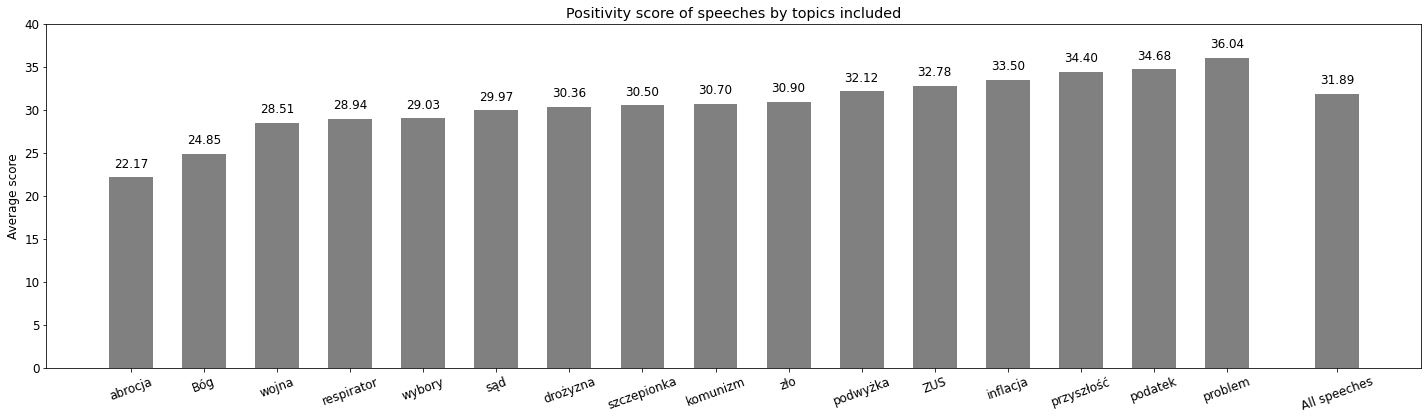

In [114]:
x = np.ndarray(17, dtype = float, buffer = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16.5]))
                                    # the label locations
width = 0.6                         # the width of the bars

fig, ax = plt.subplots(figsize = (20,6))
plt.rc('font', size = 12)           # controls default text sizes
plt.rc('xtick', labelsize = 12)     # fontsize of the tick labels
plt.rc('ytick', labelsize = 12)     # fontsize of the tick labels
plt.rc('figure', titlesize = 18)    # fontsize of the figure title

rects = ax.bar(x, sentiment_value, width, color = 'gray')

ax.set_ylabel('Average score')
ax.set_title('Positivity score of speeches by topics included')
ax.set_xticks(x, sentiment_titles)
ax.bar_label(rects, padding = 7, fmt = '%.2f')

plt.xticks(rotation = 20)
plt.ylim([0, 40])

fig.tight_layout()
plt.show()
fig.savefig('../renders/sentiment.png', dpi = 300)

In [63]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
years = [2016, 2017, 2018, 2019, 2020, 2021]
dates = [datetime.date(2015, 11, 1), datetime.date(2015, 12, 1)]

for year in years:
    for month in months:
        dates.append(datetime.date(year, month, 1))

cols = {'date': [], 'year': [], 'month': [], 'konf_mps': [], 'konf_words': [], 'pis_mps': [],
        'pis_words': [], 'po_mps': [], 'po_words': [], 'others_mps': [], 'others_words': []}
ds = pd.DataFrame(data = cols)

for d in dates:
    mps = {'Konfederacja': set(), 'PiS': set(), 'PO': set(), 'Unlisted': set()}
    m_count = {'Konfederacja': 0, 'PiS': 0, 'PO': 0, 'Unlisted': 0}

    y = d.year
    m = d.month
    for i in range(df.shape[0]):
        if df.at[i, 'date'].year == y and df.at[i, 'date'].month == m:
            mps[df.at[i, 'party']].add(df.at[i, 'posel'])
            m_count[df.at[i, 'party']] += df.at[i, 'words_count']

    ds.loc[ds.shape[0]] = [d, y, m, len(mps['Konfederacja']), m_count['Konfederacja'], len(mps['PiS']), m_count['PiS'],
                           len(mps['PO']), m_count['PO'], len(mps['Unlisted']), m_count['Unlisted']]

          date  year  month  konf_mps  konf_words  pis_mps  pis_words  po_mps  \
0   2015-11-01  2015     11         3        1495       54      31679      82   
1   2015-12-01  2015     12         4        5190      114     119882     122   
2   2016-01-01  2016      1         3        1609      110      77948     118   
3   2016-02-01  2016      2         3        2657       94      42430      92   
4   2016-03-01  2016      3         3        2869      112      88423     102   
..         ...   ...    ...       ...         ...      ...        ...     ...   
69  2021-08-01  2021      8         5        1623       20       8460      34   
70  2021-09-01  2021      9        10       18664      107      81483     101   
71  2021-10-01  2021     10        11       21363      100      77496      87   
72  2021-11-01  2021     11        10       10553       87      44536      87   
73  2021-12-01  2021     12        10       13419      106      70134      90   

    po_words  others_mps  o

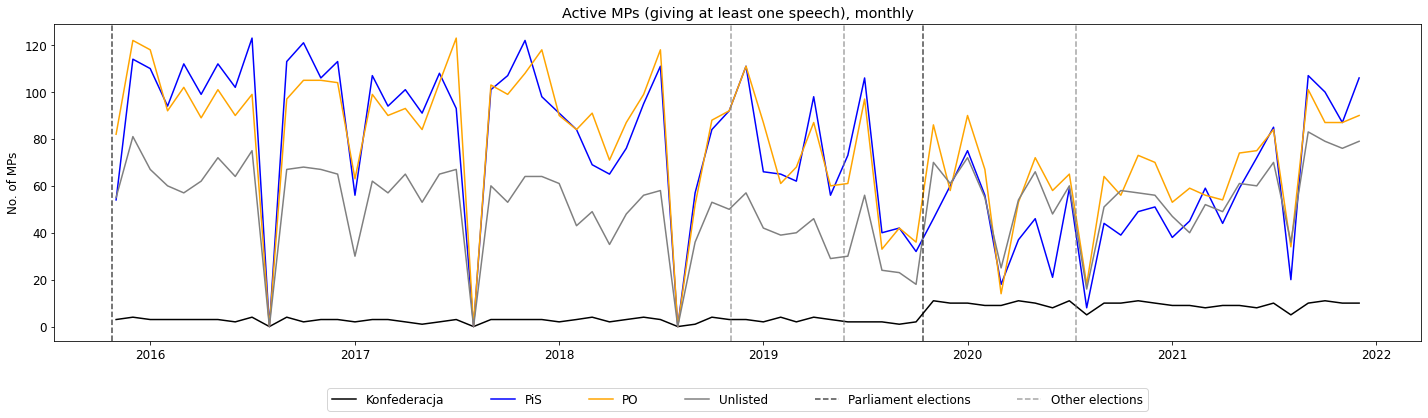

In [113]:
# MPs
fig, ax = plt.subplots(figsize = (20,6))
plt.plot(ds['date'], ds['konf_mps'], label = 'Konfederacja', color = 'black')
plt.plot(ds['date'], ds['pis_mps'], label = 'PiS', color = 'blue')
plt.plot(ds['date'], ds['po_mps'], label = 'PO', color = 'orange')
plt.plot(ds['date'], ds['others_mps'], label = 'Unlisted', color = 'gray')

plt.axvline(x = datetime.date(2015, 10, 25), color = 'black', alpha = 0.7, linestyle = '--', label = 'Parliament elections')    # Parliament (VIII)
plt.axvline(x = datetime.date(2018, 11, 4), color = 'grey', alpha = 0.7, linestyle = '--', label = 'Other elections')           # local
plt.axvline(x = datetime.date(2019, 5, 26), color = 'grey', alpha = 0.7, linestyle = '--')                                      # EParliament
plt.axvline(x = datetime.date(2019, 10, 13), color = 'black', alpha = 0.7, linestyle = '--')                                    # Parliament (IX)
plt.axvline(x = datetime.date(2020, 7, 12), color = 'grey', alpha = 0.7, linestyle = '--')                                      # presidential

ax.set_ylabel('No. of MPs')
ax.set_title('Active MPs (giving at least one speech), monthly')
ax.legend()
plt.legend(bbox_to_anchor=(0.2, -0.22, 0.6, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=6)

fig.tight_layout()
plt.show()
fig.savefig('../renders/mps.png', dpi = 300)

# Words
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(ds['date'], ds['konf_words'], label='Konfederacja', color='black')
plt.plot(ds['date'], ds['pis_words'], label='PiS', color='blue')
plt.plot(ds['date'], ds['po_words'], label='PO', color='orange')
plt.plot(ds['date'], ds['others_words'], label='Unlisted', color='gray')

plt.axvline(x = datetime.date(2015, 10, 25), color = 'black', alpha = 0.7, linestyle = '--', label = 'Parliament elections')    # Parliament (VIII)
plt.axvline(x = datetime.date(2018, 11, 4), color = 'grey', alpha = 0.7, linestyle = '--', label = 'Other elections')           # local
plt.axvline(x = datetime.date(2019, 5, 26), color = 'grey', alpha = 0.7, linestyle = '--')                                      # EParliament
plt.axvline(x = datetime.date(2019, 10, 13), color = 'black', alpha = 0.7, linestyle = '--')                                    # Parliament (IX)
plt.axvline(x = datetime.date(2020, 7, 12), color = 'grey', alpha = 0.7, linestyle = '--')                                      # presidential

ax.set_ylabel('No. of words')
ax.set_title('Words spoken by MPs, monthly')
ax.legend()
plt.legend(bbox_to_anchor=(0.2, -0.22, 0.6, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=6)

fig.tight_layout()
plt.show()
fig.savefig('../renders/words.png', dpi = 300)